<a href="https://colab.research.google.com/github/abrown12005/CMP_SC-4540-HW/blob/main/HW4/VivoSpike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This colab will use neuron spike data collected by rats and show that this data follows a Poisson process

# Start by bringing three files from the public dataset

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

data1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ec012ec.187.res.1')
data2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ec016.272.res.2')
data3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ec016.682.res.1')

# Now graph the data

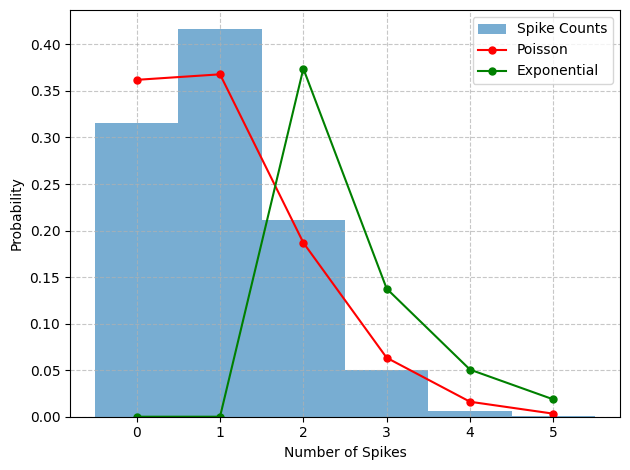

0.7809179207549644 21.908207924503564


In [2]:
poisson = st.poisson
expon = st.expon

x = data1

fig, ax = plt.subplots(1, 1)

# Extract spike times from the DataFrame
spike_times = x.iloc[:, 0].values

# Define time bins and count spikes within them
bin_width_ms = 250
max_time_ms = spike_times.max()
min_time_ms = spike_times.min()

# Create bins for counting spikes across the entire duration
count_bins_edges = np.arange(min_time_ms, max_time_ms + bin_width_ms, bin_width_ms)

# Calculate spike counts in each bin
spike_counts_in_bins, _ = np.histogram(spike_times, bins=count_bins_edges)

# Calculate the mean for the distribution ---
mu = np.mean(spike_counts_in_bins)

#Create a histogram of the spike counts
max_observed_count = int(np.max(spike_counts_in_bins))
# Define histogram bins to center around integer values for counts
hist_bins_for_counts = np.arange(0, max_observed_count + 2) - 0.5

# Plot the histogram of spike counts
ax.hist(spike_counts_in_bins, bins=hist_bins_for_counts, density=True, alpha=0.6, label='Spike Counts')

# Overlay the PMF ---
x_pmf_values = np.arange(0, max_observed_count + 1)

ax.plot(x_pmf_values, poisson.pmf(x_pmf_values, mu), 'ro-', ms=5, label=f'Poisson')
ax.plot(x_pmf_values, expon.pdf(x_pmf_values, mu), 'go-', ms=5, label=f'Exponential')

ax.set_xlabel('Number of Spikes')
ax.set_ylabel('Probability')
ax.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Caclulate the Fano factor for the data
fano_factor = np.var(spike_counts_in_bins) / np.mean(spike_counts_in_bins)
fano_tPoisn = 1
perror = np.mean(np.abs((fano_tPoisn - fano_factor) / fano_tPoisn)) * 100

print(fano_factor,perror)

It appears for the three data sets that the data fits a Poisson distribution better than an Exponential. In the selected data data1 has the best fit to the Poisson while data2 has the worst. I believe this is because in data1 the data visually looks more like a normal(ish) distribution, while data2 looks more like a log_norm distribution. However, when reducing the number of bins (or time intervals) it actually gives better Fano factor results for data2 and data3, while data1 gets worse. And as you continually increase the number of bins again the Fano factor gets worse across the board. This is likely due to the fact that the data we are modeling can be approximated as a Poisson distribution, but as we try to be more precise the approximation gets progressivly worse.